In [1]:
# +
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# +
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
# -

In [2]:
data = pd.read_csv("Data/Advertising.csv", index_col = 0)
data.head(2)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [3]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

In [4]:
# With Scaling
X_scale = scale(X, with_mean=True, with_std=False).reshape(-1,1)
model_sk_lr = LinearRegression()
model_sk_lr.fit(X_scale, y)
print(model_sk_lr.intercept_)
print(model_sk_lr.coef_[0])

[14.0225]
[0.04753664]


In [5]:
# +
# Create Mesh Grid for Gradient Descent
theta_0 = np.linspace(model_sk_lr.intercept_-2, model_sk_lr.intercept_+2, 50)
theta_1 = np.linspace(model_sk_lr.coef_[0]-0.02, model_sk_lr.coef_[0]+0.02, 50)
xx, yy = np.meshgrid(theta_0, theta_1)
z = np.zeros(shape = (xx.shape))

y = data['Sales'].values
for (i,j), value in np.ndenumerate(z):
    prediction = xx[i, j] + X_scale.ravel()*yy[i, j]  # Beware of ravel usage. Ravel flattens to 1D array
    z[i, j] = ((y - prediction)**2).sum()/1000

min_rss = np.sum((model_sk_lr.intercept_ + model_sk_lr.coef_*X_scale - y.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

(0.02, 0.07)

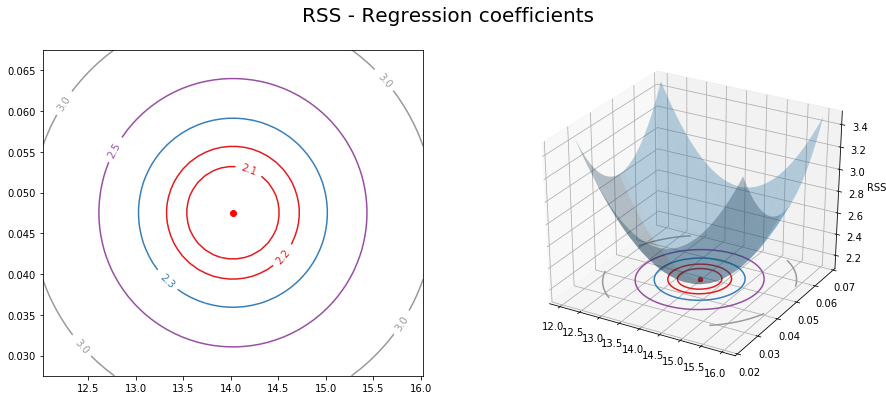

In [6]:
# +
## Create Contour & Cost Function 
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
CS = ax1.contour(xx, yy, z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(model_sk_lr.intercept_, model_sk_lr.coef_[0], c='r')
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

ax2 = fig.add_subplot(122, projection='3d') # Check for 3D plot selection
ax2.plot_surface(xx, yy, z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, z, offset=z.min(), cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])  # Check for offsetting the contour to min(z)
ax2.scatter3D(model_sk_lr.intercept_, model_sk_lr.coef_[0], min_rss, c='r')
ax2.set_zlabel('RSS')
ax2.set_zlim(z.min(),z.max())
ax2.set_ylim(0.02,0.07)

In [7]:
# +
# Without Scaling
## Scikit Learn
model_sk_lr = LinearRegression()
model_sk_lr.fit(X, y)
print(model_sk_lr.intercept_)
print(model_sk_lr.coef_[0])

## Stats Model
model_sm = smf.ols('Sales~TV', data).fit()
model_sm.summary().tables[1]

7.032593549127693
0.047536640433019764


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [8]:
# +
## Generating Mesh Grid
theta_0 = np.linspace(model_sk_lr.intercept_ - 2, model_sk_lr.intercept_ + 2, 50)
theta_1 = np.linspace(model_sk_lr.coef_ - .02, model_sk_lr.coef_ + .02, 50)
xx, yy = np.meshgrid(theta_0, theta_1)
z = np.zeros(shape = (xx.shape))

y = data['Sales'].values
for (i,j), value in np.ndenumerate(z):
    z[i, j] = ((y - (xx[i,j] + X.ravel()*yy[i,j]))**2).sum()/1000

min_rss =  ((y - (model_sk_lr.intercept_ + model_sk_lr.coef_*X.ravel()))**2).sum()/1000
print(min_rss)

2.1025305831313514


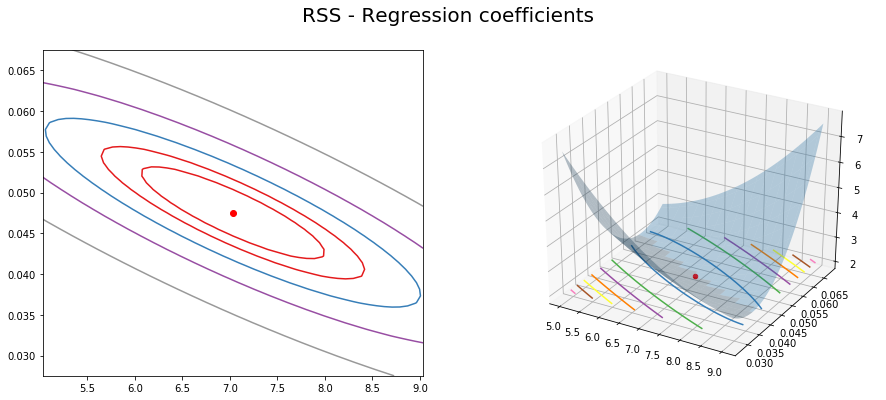

In [9]:
# +
## Create Contour & Cost Function 
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax1.contour(xx, yy, z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(model_sk_lr.intercept_, model_sk_lr.coef_, c = 'r')

ax2 = fig.add_subplot(122, projection='3d')
ax2.contour(xx, yy, z, offset = z.min(), cmap=plt.cm.Set1)
ax2.scatter3D(model_sk_lr.intercept_, model_sk_lr.coef_, z.min(), c = 'r')
ax2.plot_surface(xx, yy, z, rstride=3, cstride=3, alpha=0.3)

# We can clearly see there exists wide range of coeff values for which the cost is still minimum. Hence it is good to scale the values.

## Multiple Linear Regression

In [10]:
# +
# X = scale(data[['Radio', 'TV']].values, with_mean = True, with_std=False)
X = data[['Radio', 'TV']].values
y = data['Sales']

model_sk_lr = LinearRegression()
model_sk_lr.fit(X, y)
print(model_sk_lr.coef_)
print(model_sk_lr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


In [11]:
# +
# Generating Mesh Grid & Predicting the cost surface
theta_0 = np.linspace(model_sk_lr.intercept_ - 1, model_sk_lr.intercept_ + 1, 50)
theta_1 = np.linspace(model_sk_lr.coef_[0] - 0.2, model_sk_lr.coef_[0] + 0.2, 50)
theta_2 = np.linspace(model_sk_lr.coef_[1] - 0.02, model_sk_lr.coef_[1] + 0.02, 50)
xx, yy = np.meshgrid(theta_1, theta_2)
z = np.zeros(shape = (xx.shape))

for (i,j), value in np.ndenumerate(z):
    z[i, j] = ((y - (model_sk_lr.intercept_ + X[:,0].ravel()*xx[i,j] + X[:,1].ravel()*yy[i,j]))**2).sum()/1000

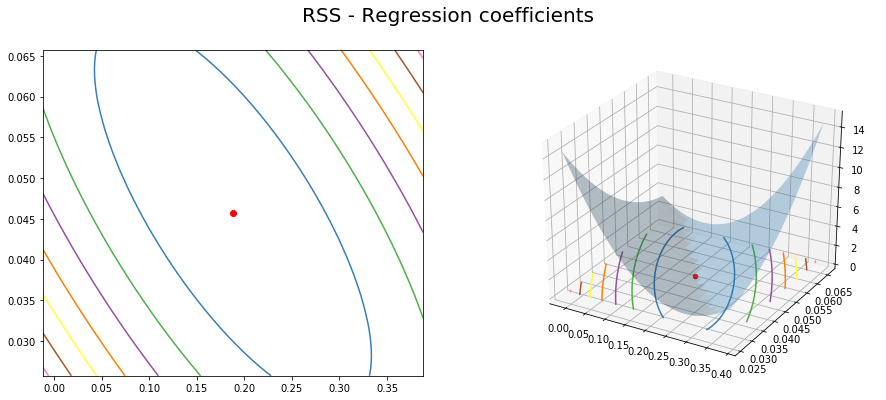

In [12]:
# +
## Create Contour & Cost Function 
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax1.contour(xx, yy, z, cmap=plt.cm.Set1)#, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(model_sk_lr.coef_[0], model_sk_lr.coef_[1], c = 'r')

ax2 = fig.add_subplot(122, projection='3d')
ax2.contour(xx, yy, z, offset = z.min(), cmap=plt.cm.Set1)
ax2.scatter3D(model_sk_lr.coef_[0], model_sk_lr.coef_[1], z.min(), c = 'r')
ax2.plot_surface(xx, yy, z, rstride=3, cstride=3, alpha=0.3)

C:\Users\PanduranganR\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  


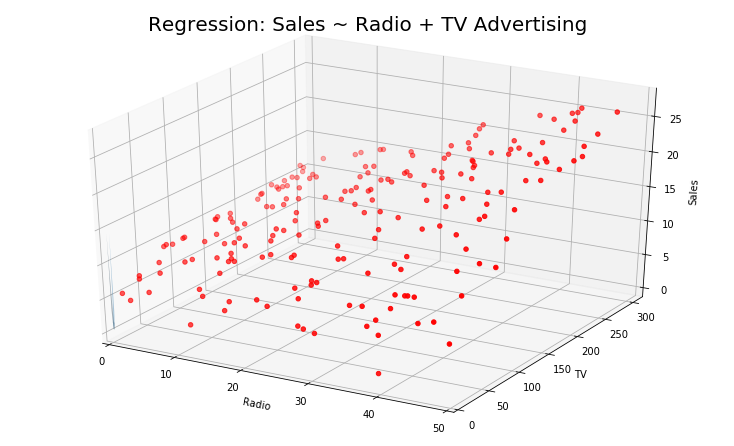

In [13]:
# +
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(xx, yy, z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(data.Radio, data.TV, data.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');
# -

In [14]:
# ## With Scaling

# +
X = scale(data[['Radio', 'TV']].values, with_mean = True, with_std=False)
# X = data[['Radio', 'TV']].values
y = data['Sales']

model_sk_lr = LinearRegression()
model_sk_lr.fit(X, y)
print(model_sk_lr.coef_)
print(model_sk_lr.intercept_)

[0.18799423 0.04575482]
14.0225


In [15]:
# +
# Generating Mesh Grid & Predicting the cost surface
theta_0 = np.linspace(model_sk_lr.intercept_ - 1, model_sk_lr.intercept_ + 1, 50)
theta_1 = np.linspace(model_sk_lr.coef_[0] - 0.2, model_sk_lr.coef_[0] + 0.2, 50)
theta_2 = np.linspace(model_sk_lr.coef_[1] - 0.02, model_sk_lr.coef_[1] + 0.02, 50)
xx, yy = np.meshgrid(theta_1, theta_2)
z = np.zeros(shape = (xx.shape))

for (i,j), value in np.ndenumerate(z):
    z[i, j] = ((y - (model_sk_lr.intercept_ + X[:,0].ravel()*xx[i,j] + X[:,1].ravel()*yy[i,j]))**2).sum()/1000

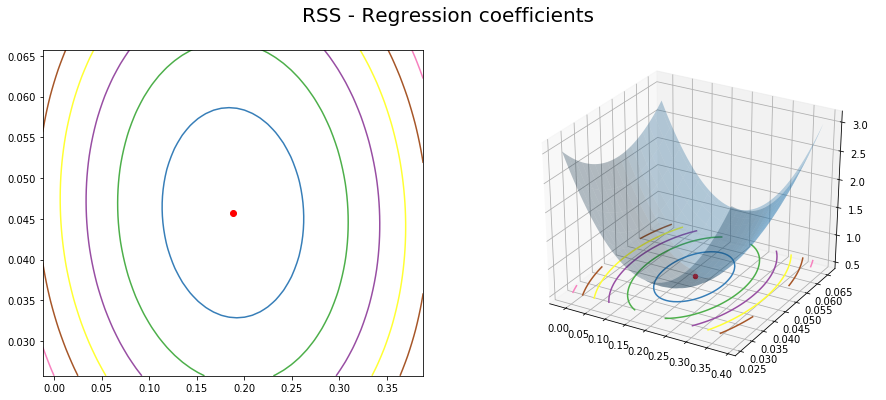

In [16]:
# +
## Create Contour & Cost Function 
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax1.contour(xx, yy, z, cmap=plt.cm.Set1)#, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(model_sk_lr.coef_[0], model_sk_lr.coef_[1], c = 'r')

ax2 = fig.add_subplot(122, projection='3d')
ax2.contour(xx, yy, z, offset = z.min(), cmap=plt.cm.Set1)
ax2.scatter3D(model_sk_lr.coef_[0], model_sk_lr.coef_[1], z.min(), c = 'r')
ax2.plot_surface(xx, yy, z, rstride=3, cstride=3, alpha=0.3)
# -

In [17]:
#

# +
## Predicting the hyper plane
# Generating Mesh Grid & Predicting the cost surface
theta_0 = np.linspace(-30, 30)
theta_1 = np.linspace(150, 150)
xx, yy = np.meshgrid(theta_0, theta_1)
z = np.zeros((theta_0.size, theta_1.size))

for (i,j), value in np.ndenumerate(z):
    z[i, j] = model_sk_lr.intercept_ + model_sk_lr.coef_[0]*xx[i,j] + model_sk_lr.coef_[1]*yy[i,j]

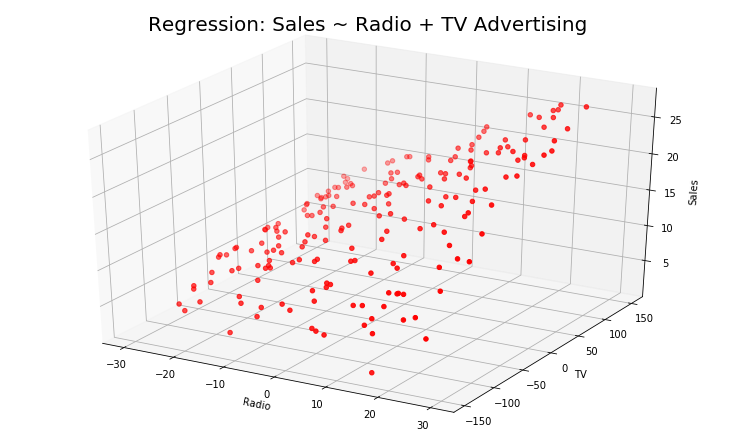

In [18]:
# +
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(xx, yy, z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(X[:,0], X[:,1], data.Sales, c='r')

ax.set_xlabel('Radio')
# ax.set_xlim(0,50)
ax.set_ylabel('TV')
# ax.set_ylim(ymin=0?)
ax.set_zlabel('Sales');

In [19]:
## Scaling 
# -

# Notes :         
# 1. Scaling changes the intercept values and not the coefficient values.             
# 2. Beware of ravel function (it flattens the numpy array). that it doesnt cause any dubious sum during calculating cost (z)         
# 3. Scaling causes the contour to look so circular and hence faster convergence during gradient descent. Also, the coeff estimates will be stable, so you can see in non-scaled scenarios, the cost function has big range of coeffcients for similar errors.            
# 4. In multiple regresion, we can create the grid based on coef values. Hence accordingly linspace. 
#

## Auto Data : Residual & Interaction Power

In [21]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto['horsepower2'] = auto['horsepower']**2
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0


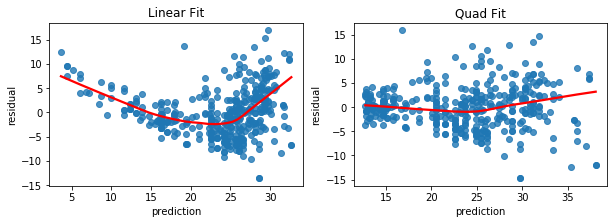

In [22]:
# +
# Without horsepower2
X = auto['horsepower'].values.reshape(-1,1)
y = auto['mpg']
model1 = LinearRegression()
model1.fit(X, y)

auto['prediction'] = model1.predict(X)
auto['residual'] = y - auto['prediction']
plt.figure(figsize = (10,3))
plt.subplot(121)
sns.regplot(x = auto['prediction'], y = auto['residual'], lowess=True, line_kws={'color':'r'})
plt.title("Linear Fit")

X = auto[['horsepower', 'horsepower2']].values
model1 = LinearRegression()
model1.fit(X, y)
auto['prediction'] = model1.predict(auto[['horsepower', 'horsepower2']].values)
auto['residual'] = y - auto['prediction']
plt.subplot(122)
plt.title("Quad Fit")
sns.regplot(x = auto['prediction'], y = auto['residual'], lowess=True, line_kws={'color':'r'})

# -

### Notes:              
1. The scatter is plotted with fitted values or predicted values. And not with respect to original target value.            
2. This is mainly to check if any dependence on prediction and residuals.


## Credit Card data : Correlation & Convergence

In [25]:
credit = pd.read_csv('Data/Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(2)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1


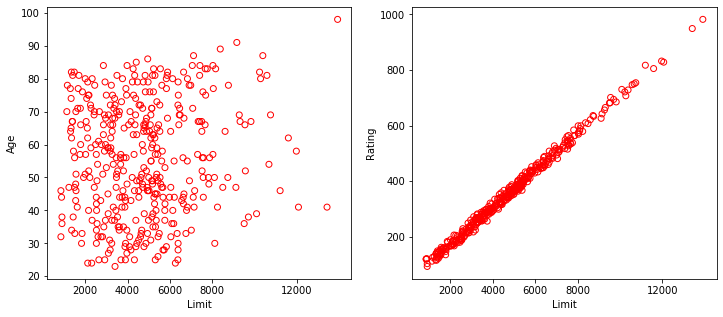

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

In [27]:
# Model with Age & Limit
X = scale(credit[['Age', 'Limit']], with_std = False)
y = credit['Balance']
model1 = LinearRegression()
model1.fit(X, y)
print(model1.coef_)
print(model1.intercept_)

X = scale(credit[['Rating', 'Limit']], with_std = False)
y = credit['Balance']
model2 = LinearRegression()
model2.fit(X, y)
print(model2.coef_)
print(model2.intercept_)

[-2.29148553  0.17336497]
520.0150000000001
[2.20167217 0.02451438]
520.015


In [48]:
Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

theta_0 = np.linspace(model1.coef_[0]-3, model1.coef_[0]+3, 100)
theta_1 = np.linspace(model1.coef_[1]-0.02, model1.coef_[1]+0.02, 100)
xx, yy = np.meshgrid(theta_0, theta_1)
z = np.zeros(shape = (theta_0.size, theta_1.size))

for (i, j), val in np.ndenumerate(z):
    z[i, j] = ((y - (model1.intercept_ + Age_scaled.ravel()*xx[i, j] + Limit_scaled.ravel()*yy[i, j]))**2).sum()/1000000

In [52]:
theta_2 = np.linspace(model2.coef_[0]-50, model2.coef_[0]+50, 100)
theta_3 = np.linspace(model2.coef_[1]-5, model2.coef_[1]+5, 100)

xx1, yy1 = np.meshgrid(theta_2, theta_3)
z1 = np.zeros(shape = (theta_2.size, theta_3.size))

for (i, j), val in np.ndenumerate(z1):
    z1[i, j] = ((y - (model2.intercept_ + Rating_scaled.ravel()*xx1[i, j] + Limit_scaled.ravel()*yy1[i, j]))**2).sum()/10000000

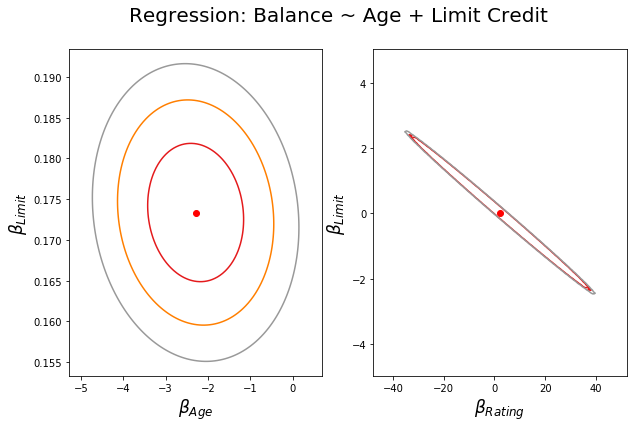

In [56]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Balance ~ Age + Limit Credit', fontsize=20)

ax = fig.add_subplot(121)
ax.scatter(model1.coef_[0], model1.coef_[1], c = 'r')
ax.contour(xx, yy, z, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax.set_xlabel(r'$\beta_{Age}$', fontsize=17)

ax1 = fig.add_subplot(122)
ax1.scatter(model2.coef_[0], model2.coef_[1], c = 'r')
ax1.contour(xx1, yy1, z1, cmap=plt.cm.Set1, levels=[10, 11])
ax1.set_xlabel(r'$\beta_{Rating}$', fontsize=17)

for ax in fig.axes:
    ax.set_ylabel(r'$\beta_{Limit}$', fontsize=17)

### Notes:
1. The correlated variables the contour is squashed implying wider range of coeff with similar cost. Coeff unstable
2. Also, you need to vary the meshgrid in right side plot to fit the contours. Check the tolerance provided in code to simulate the contours.

### Variance Inflation Factor

In [57]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.0113846860681328
160.66830095856935
160.59287978597942


### Notes:
1. The correlated variables have high VIF implying presence of multicollinearity. They wont be fully observed even through correlation matrix. It is advisable to check VIF.
2. Keeping both variables can cause instability in coeff values with small change in data. Use domain knowledge to understand which variables to drop.